In [ ]:
# Classify the email using the binary classification method. Email Spam detection has two states: 
#a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors, Support Vector Machine Naive Bay’s algorithm, for classification. Analyze their performance. 
#Perform following operations

#i)Data preprocessing & clearing ,ii)Exploratory data analysis

#iii)Correlation,  iv) Graph of frequent words in spam email

#v)Graph of frequent words in non spam email, vi)Graph of accuracy verse models

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('emails.csv')

In [3]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [4]:
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.shape

(5172, 3002)

In [6]:
df.type

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    0
5170    0
5171    0
Name: type, Length: 5172, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [8]:
df.isnull().sum

<bound method DataFrame.sum of       Email No.    the     to    ect    and    for     of      a    you  \
0         False  False  False  False  False  False  False  False  False   
1         False  False  False  False  False  False  False  False  False   
2         False  False  False  False  False  False  False  False  False   
3         False  False  False  False  False  False  False  False  False   
4         False  False  False  False  False  False  False  False  False   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
5167      False  False  False  False  False  False  False  False  False   
5168      False  False  False  False  False  False  False  False  False   
5169      False  False  False  False  False  False  False  False  False   
5170      False  False  False  False  False  False  False  False  False   
5171      False  False  False  False  False  False  False  False  False   

        hou  ...  connevey    jay  valued    lay  infrastructure  mi

In [9]:
df.drop(['Email No.'],axis=1,inplace=True)

In [10]:
#Exploratory Data Analysis (EDA)

print(df['to'].value_counts())

to
0      1051
1       704
2       544
3       503
4       375
       ... 
111       1
63        1
65        1
85        1
88        1
Name: count, Length: 72, dtype: int64


In [11]:
# Fill or drop missing values
df.fillna(df.mean(), inplace=True)

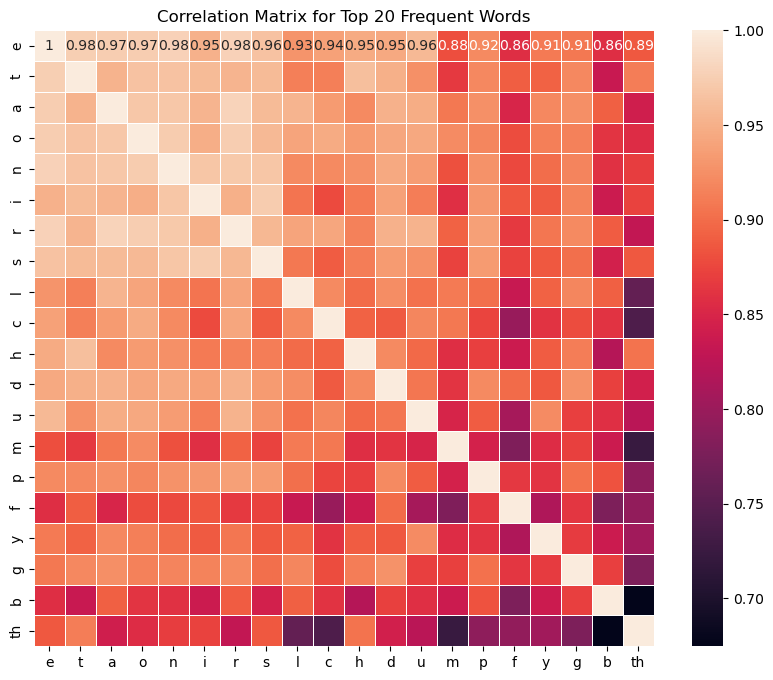

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#get top 20 words to show in correlation matrix
word_data=df.drop(columns=['Prediction'])
word_freq=word_data.sum(axis=0)
top_20_word=word_freq.nlargest(20).index
top_20_word_data=word_data[top_20_word]

correlation_matrix=top_20_word_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, linewidths=0.5)
plt.title('Correlation Matrix for Top 20 Frequent Words')
plt.show()

In [17]:
#Feature Scaling: Standardize or normalize the data for better performance in models like KNN and SVM

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_features=scaler.fit_transform(df.drop('the',axis=1))

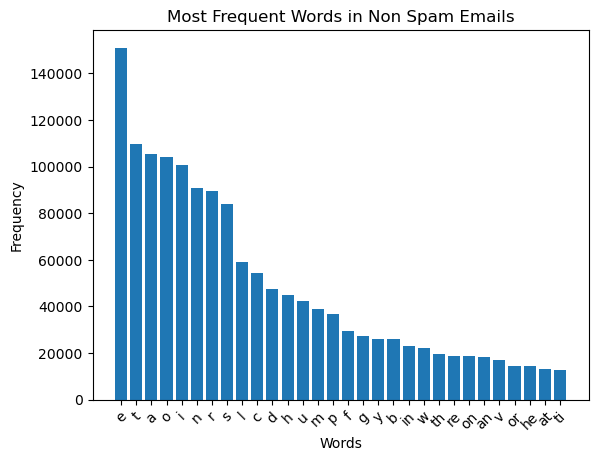

In [18]:
#filter out non spam emails let 1 define non spam emails
non_spam=df[df['Prediction']==1]

non_spam_word=non_spam.drop(columns=['Prediction'])

word_freq=non_spam_word.sum(axis=0)

top_words=word_freq.nlargest(30)

plt.bar(top_words.index, top_words.values)
plt.title('Most Frequent Words in Non Spam Emails')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()

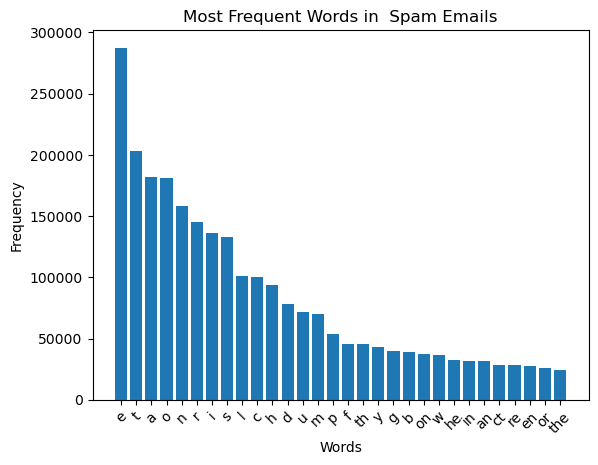

In [19]:
#filter out non spam emails let 0 define  spam emails
spam=df[df['Prediction']==0]

spam_word=spam.drop(columns=['Prediction'])

word_freq=spam_word.sum(axis=0)

top_words=word_freq.nlargest(30)

plt.bar(top_words.index, top_words.values)
plt.title('Most Frequent Words in  Spam Emails')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()

In [20]:
df['Prediction']=df['Prediction'].replace({0:'Spam',1:'Not Spam'})

In [21]:
df.head(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,Spam
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,Spam
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,Spam
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,Spam


In [22]:
from sklearn.model_selection import train_test_split

X=df.drop("Prediction",axis=1)
y=df["Prediction"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
#training models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

knn_accuracy = accuracy_score(y_test,knn_pred)

svm = SVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

svm_accuracy = accuracy_score(y_test,svm_pred)

nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)

nb_accuracy = accuracy_score(y_test,nb_pred)

In [31]:
print(f'KNN Accuracy: {knn_accuracy:.2f}')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')

KNN Accuracy: 0.86
SVM Accuracy: 0.82
Naive Bayes Accuracy: 0.95


In [32]:
knn_report = classification_report(y_test, knn_pred)
svm_report = classification_report(y_test, svm_pred)
nb_report = classification_report(y_test, nb_pred)

In [33]:
print("K-Nearest Neighbors Classification Report:")
print(knn_report)

print("SVM Classification Report:")
print(svm_report)

print("NB Neighbors Classification Report:")
print(nb_report)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.73      0.84      0.78       296
        Spam       0.93      0.87      0.90       739

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035

SVM Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.91      0.40      0.56       296
        Spam       0.80      0.98      0.88       739

    accuracy                           0.82      1035
   macro avg       0.86      0.69      0.72      1035
weighted avg       0.83      0.82      0.79      1035

NB Neighbors Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.87      0.96      0.91       296
        Spam       0.98      0.94      0.96       739

    accuracy                           0.95      1035
   macro avg       0.9

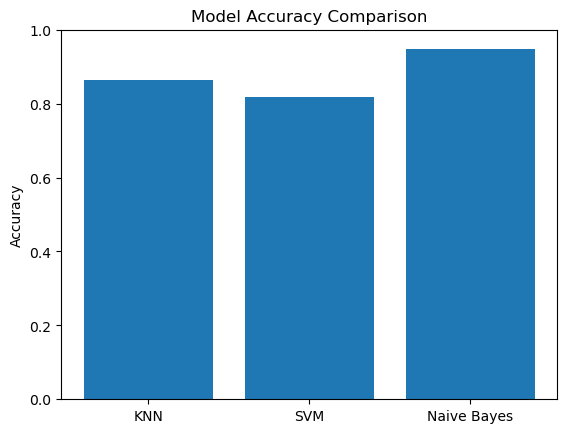

In [36]:
#graph
model_names=['KNN','SVM','Naive Bayes']
accuracies = [knn_accuracy, svm_accuracy, nb_accuracy]

plt.bar(model_names,accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()